# 치킨 주문 분석 

In [31]:
from glob import glob
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

from matplotlib import font_manager, rc

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
%matplotlib inline

In [4]:
lists = glob('data/chicken/*.csv') 
lists

['data/chicken\\201601.csv',
 'data/chicken\\201602.csv',
 'data/chicken\\201603.csv',
 'data/chicken\\201604.csv',
 'data/chicken\\201605.csv',
 'data/chicken\\201606.csv',
 'data/chicken\\201607.csv',
 'data/chicken\\201608.csv',
 'data/chicken\\201609.csv',
 'data/chicken\\201610.csv',
 'data/chicken\\201611.csv',
 'data/chicken\\201612.csv',
 'data/chicken\\total.csv']

In [5]:
df = pd.DataFrame()
for data in lists:
    tmp = pd.read_csv(data)
    df = df.append(tmp)

In [7]:
df.head()

,기준일,성별,시군구,시도,업종,연령대,요일,읍면동,통화건수
0,20160101,남,강남구,서울특별시,치킨,50대,금,NaN,68
1,20160101,여,강남구,서울특별시,치킨,50대,금,NaN,75
2,20160101,남,강남구,서울특별시,치킨,30대,금,NaN,237
3,20160101,남,강남구,서울특별시,치킨,40대,금,NaN,139
4,20160101,여,강남구,서울특별시,치킨,20대,금,NaN,150


In [8]:
col_list = df.columns.tolist()
df = df.rename(columns={col_list[-1]:'기준일'})

In [9]:
# df.to_csv("data/chicken/total.csv",encoding='utf8',index=False)

In [13]:
df = pd.read_csv("data/chicken/total.csv")

In [14]:
df['시도'].unique()

array(['서울특별시'], dtype=object)

In [15]:
df['기준일'] = pd.to_datetime(df['기준일'],format='%Y%m%d')
df['기준월'] = pd.to_datetime(df['기준일']).dt.month

In [16]:
df.head(3)

,성별,시군구,시도,업종,연령대,요일,읍면동,통화건수,기준일,기준월
0,남,강남구,서울특별시,치킨,50대,금,NaN,68,2016-01-01,1
1,여,강남구,서울특별시,치킨,50대,금,NaN,75,2016-01-01,1
2,남,강남구,서울특별시,치킨,30대,금,NaN,237,2016-01-01,1


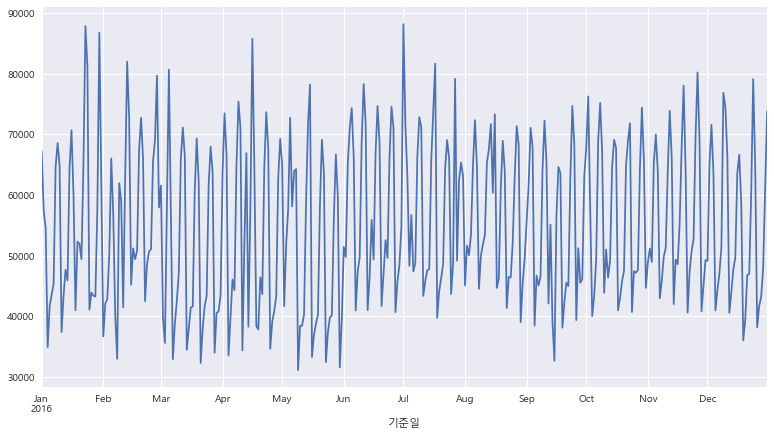

In [124]:
plt.figure(figsize=(13,7))
df.groupby(['기준일'])['통화건수'].sum().plot()

In [117]:
total_call = np.sum(df['통화건수'])
percent_call = df.groupby(['요일'])['통화건수'].agg({'ratio': np.sum }).apply(lambda x:str(int(round(x[0]/ total_call,2) * 100)) + "%", axis=1)

In [79]:
print(percent_call.index)
print(percent_call.values)

Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object', name='요일')
['17%' '12%' '12%' '11%' '17%' '19%' '12%']


In [95]:
dict_percent = dict(zip(percent_call.index,percent_call.values))
dict_percent

{'금': '17%',
 '목': '12%',
 '수': '12%',
 '월': '11%',
 '일': '17%',
 '토': '19%',
 '화': '12%'}

## 요일별 주문 
 - 금,토요일 주문이 많은 양을 차지한다. 

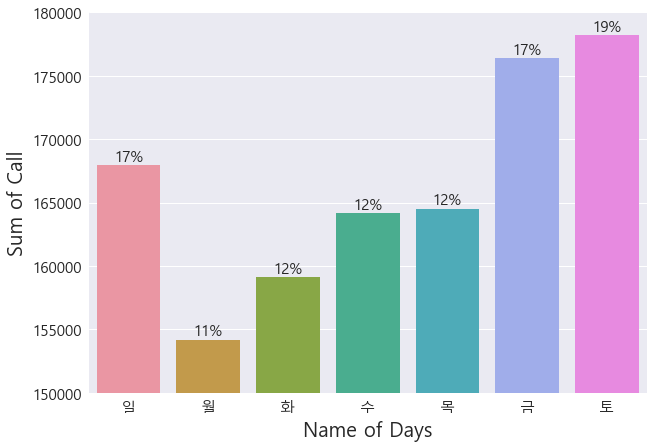

In [98]:
plt.figure(figsize=(10,7))
#sns.set(font_scale = 1)
ax = sns.countplot(data=df[['요일','통화건수']],x='요일', order=['일','월','화','수','목','금','토'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Name of Days",fontsize=20)
plt.ylabel("Sum of Call",fontsize=20)
plt.ylim(150000,180000)
rects = ax.patches
labels = ax.get_xticklabels()
for label, rect in zip(labels,rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, dict_percent[label.get_text()], ha='center', va='bottom', fontsize=15)

## 연령대별 주문 

(array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.]), <a list of 8 Text yticklabel objects>)

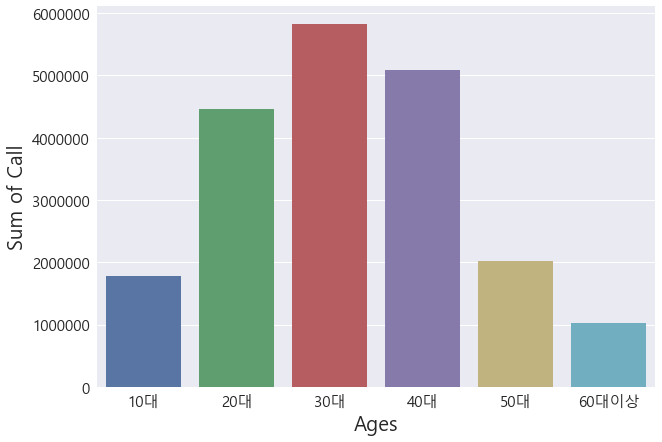

In [100]:
sumOfcallAges = pd.DataFrame({'cnt':df.groupby(['연령대'])['통화건수'].sum()}).reset_index()
order_list = sumOfcallAges['연령대']
plt.figure(figsize=(10,7))
ax = sns.barplot(x='연령대',y='cnt',data=sumOfcallAges, order=order_list)
plt.xlabel("Ages",fontsize=20)
plt.ylabel("Sum of Call",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## 구별 주문 

(array([       0.,   200000.,   400000.,   600000.,   800000.,  1000000.,
         1200000.,  1400000.,  1600000.,  1800000.]),
 <a list of 10 Text yticklabel objects>)

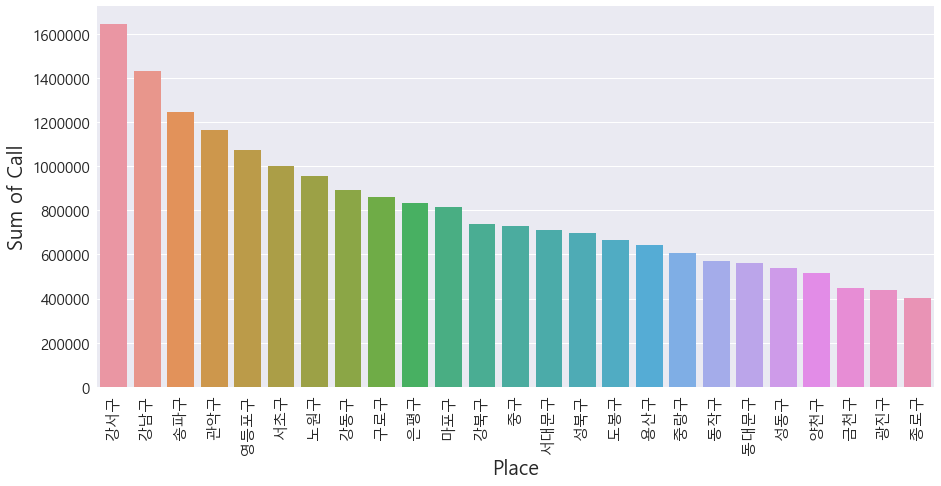

In [102]:
sumOfplace = pd.DataFrame({'cnt':df.groupby(['시군구'])['통화건수'].sum()}).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x='시군구',y='cnt',data=sumOfplace, order=sumOfplace.sort_values(by='cnt', ascending=False)['시군구'])
plt.xlabel("Place",fontsize=20)
plt.ylabel("Sum of Call",fontsize=20)
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)

In [106]:
sumOfmonth = df.groupby(['기준월'])['통화건수'].sum()
sumOfmonth

기준월
1     1719234
2     1616034
3     1553373
4     1641102
5     1576458
6     1730811
7     1830339
8     1748730
9     1611513
10    1753332
11    1693608
12    1701114
Name: 통화건수, dtype: int64

(1500000, 1850000)

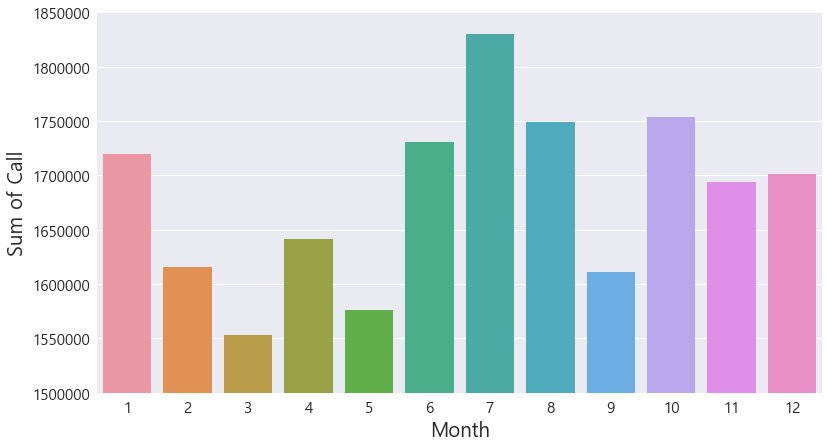

In [116]:
plt.figure(figsize=(13,7))
sns.barplot(x=sumOfmonth.index,y=sumOfmonth.values)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Sum of Call",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(1500000,1850000)